In [25]:
import nltk
nltk.download('stopwords')
nltk.download("popular")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\awadh\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\awa

True

In [26]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import os
data = pd.read_csv(r"C:/Users/awadh/Hotel_train.csv",encoding='latin-1')
data_test = pd.read_csv(r"C:/Users/awadh/Hotel_test.csv",encoding='latin-1')

# 1: happy
# 0: not happy

In [27]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [28]:
data.shape

(38932, 5)

In [5]:
#EDA Analysis

In [30]:
data_eda = data.copy()

In [31]:
data_eda['Is_Response'] = data_eda['Is_Response'].map({'happy':1, 'not happy':0})

In [32]:
data_eda.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,0
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,0
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,0
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,1
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,0


In [33]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [34]:
pd.isnull(data_eda).sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [35]:
data_eda.groupby('Is_Response').describe()

User_ID                      Description         \
              count unique      top freq       count unique   
Is_Response                                                   
0             12411  12411  id39666    1       12411  12411   
1             26521  26521  id26127    1       26521  26521   

                                                                     \
                                                           top freq   
Is_Response                                                           
0            Hall ways were smelling badly and with no air ...    1   
1            This was the first time that my girlfriend and...    1   

            Browser_Used                             Device_Used         \
                   count unique            top  freq       count unique   
Is_Response                                                               
0                  12411     11           Edge  3916       12411      3   
1                  26521     11  Google Chrome  4035       26521      3   

                             
                 top   freq  
Is_Response                  
0            Desktop   4431  
1             Mobile  10602

In [36]:
data_eda['Description_len'] = data_eda.Description.apply(len)
data_eda.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_len
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,0,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,0,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,0,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,1,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,0,1613


In [37]:
data_eda['Is_Response'] = data_eda['Is_Response'].map({1:'happy', 0:'not happy'})

In [38]:
data_eda.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Description_len
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,248
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1077
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1327
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,502
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1613


In [39]:
#Ratio
print ('not happy ratio = ', round(len(data_eda[data_eda['Is_Response']=='not happy']) / len(data_eda.Is_Response),2)*100,'%')
print ('happy ratio  = ', round(len(data_eda[data_eda['Is_Response']=='happy']) / len(data_eda.Is_Response),2)*100,'%')

not happy ratio =  32.0 %
happy ratio  =  68.0 %


In [40]:
#Label coding 0 and 1
data_eda['Is_Response'].replace({'not happy':0,'happy':1},inplace=True)

C:\Users\awadh\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\awadh\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0.5, 0, 'Feedback Length')

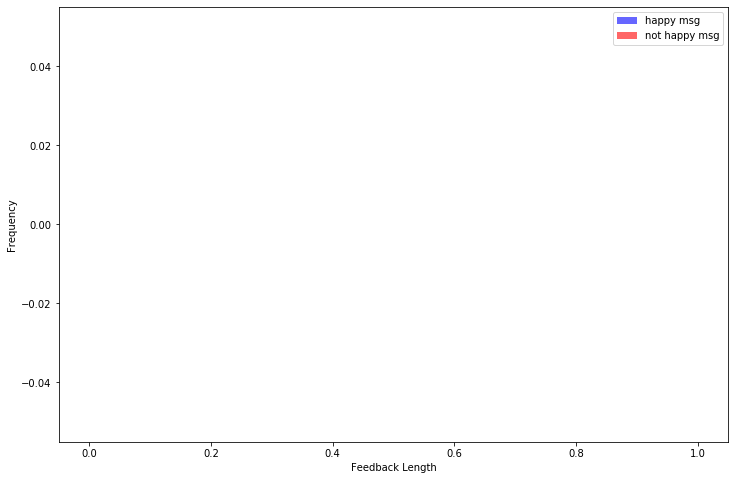

In [17]:
plt.figure(figsize=(12, 8))

data_eda[data_eda.Is_Response=='happy'].Description_len.plot(bins=35, kind='hist', color='blue', label='happy msg', alpha=0.6)
data_eda[data_eda.Is_Response=='not happy'].Description_len.plot(kind='hist', color='red', label='not happy msg', alpha=0.6)
plt.legend()
plt.xlabel("Feedback Length")

In [41]:
filter_data = data.copy()
filter_data['Is_Response'] = filter_data['Is_Response'].map({'happy':1, 'not happy':0})
X_message=filter_data.iloc[:,1]
Y_class=filter_data.iloc[:,4]

In [42]:
# make a dictionary of Contractions

contraction_mapping={
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [49]:
# function to pre-process the text
def cleaner(text):
    newString=re.sub(r"@[a-zA-Z0-9]+","",text)         # removing user mentions
    newString=re.sub("#","",newString) 
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])
    x=re.sub(r'http\S+','',newString)                  # remove URL's
    newString=re.sub(r"'s\b"," is",newString)         # removing 's
    x=re.sub(r'[%#@$&!+|ð¦±]','',newString)          # Remove spacial char
    x=re.sub(r'[.,:;]','',newString)                   # remove punctuations mark
    newString=re.sub("[^a-zA-Z]"," ",newString)         # fetching out only char
    #lower_case=letters_only.lower()                     # converting everything in lowercase
    words=newString.split()                            # split based on space to remove multiple spaces
    return (" ".join(words)).strip()

In [50]:
corpus = []
for i in range(0, len(X_message)):
  cleaned_text = cleaner(X_message[i])
  corpus.append(cleaned_text)

In [51]:
corpus[0]

'The room was kind of clean but had a VERY strong smell of dogs Generally below average but ok for a overnight stay if you are not too fussy Would consider staying again if the price was right Breakfast was free and just about better than nothing'

In [52]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus_final = []
for i in range(0, len(corpus)):
    review = re.sub('[^a-zA-Z]', ' ', corpus[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_final.append(review)

In [47]:
corpus_final[3]

'stay husband son way alaska cruis love hotel great experi ask room north tower face north west best view high floor stun view needl citi even cruis ship order room servic dinner could enjoy perfect view room servic dinner delici perfect spot walk everywher enjoy citi almost forgot heavenli bed heavenli'

In [55]:
X_message_test=data_test.iloc[:,1]

In [57]:
corpus_test = []
for i in range(0, len(X_message_test)):
  cleaned_text_test = cleaner(X_message_test[i])
  corpus_test.append(cleaned_text_test)

In [58]:
corpus_test[0]

'Looking for a motel in close proximity to TV taping of a Dr Phil show we chose the Dunes on Sunset Blvd in West Hollywood Although the property displayed the AAA emblem it certainly left a lot to be desired There were chips scrapes on the bottom of the door frame in the bathroom and the lotion containers were half full apparently not replaced by housekeeping We needed an early wakeup call but could not use the clock radio alarm as there was not a radio in the room There was no TV channel listing on the remote or on the TV menu making viewing a chore The TV remote had to be returned when checking out This place served its purpose but not a place to revisit'

In [59]:
#test Data sets 

In [ ]:
ps_test = PorterStemmer()
corpus_final_test = []
for i in range(0, len(corpus_test)):
    review = re.sub('[^a-zA-Z]', ' ', corpus_test[i])
    review = review.lower()
    review = review.split()
    review = [ps_test.stem(word) for word in review if not word in stopwords.words('english')]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_final_test.append(review)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_test=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_test_val=tfidf_test.fit_transform(corpus_final_test).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_train=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_train.fit_transform(corpus).toarray()

In [ ]:
X

In [ ]:
print("X_shape",X.shape)
print("y_class",Y_class.shape)
print("X_Type",type(X))
print("Y_Type",type(Y_class))
print("-----------------------------")
Y = Y_class.values
print("Y_Type",type(Y_train))


In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [ ]:
# Examine the vocabulary and document-term matrix together
my_corpus = pd.DataFrame(X_train, columns=tfidf_train.get_feature_names())

In [ ]:
my_corpus.head(2)

In [ ]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
hotel_review_model = MultinomialNB().fit(X_train, Y_train)
hotel_review_model

In [ ]:
# implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=200,criterion='entropy')
rf_model.fit(X_train, Y_train)

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC_model = PassiveAggressiveClassifier(n_iter_no_change=50)
PAC_model.fit(X_train, Y_train)

In [ ]:
!pip install xgboost



In [ ]:
from xgboost import XGBClassifier
#lf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)
XGB_model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
XGB_model.fit(X_train, Y_train)


In [ ]:
y_pred=XGB_model.predict(X_test)

In [ ]:
y_pred

In [ ]:
Ya = Y_test  # Real Value
Yp = hotel_review_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(Ya,Yp)
print(cm_NB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_NB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

In [ ]:
Ya = Y_test  # Real Value
Yp = rf_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(Ya,Yp)
print(cm_RF)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_RF,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

In [ ]:
Ya = Y_test  # Real Value
Yp = PAC_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_PAC = confusion_matrix(Ya,Yp)
print(cm_PAC)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_PAC,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

In [ ]:
Ya = Y_test  # Real Value
Yp = XGB_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_XGB = confusion_matrix(Ya,Yp)
print(cm_XGB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_XGB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
XGB_model_probability = XGB_model.predict_proba(X_test)
print(XGB_model_probability)

print("Length of X_test: ",len(X_test))
print("length of Log_Model_prob: ",len(XGB_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = XGB_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(Y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(Y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)

In [ ]:
## Get Features names
feature_names = tfidf_train.get_feature_names()
feature_names

In [ ]:
### Print most +ve (Real) words 
list_positive=sorted(zip(PAC_model.coef_[0], feature_names), reverse=True)[:50]

In [ ]:
# # extract only the word and not the similarity score
words_positive = list(map(lambda x: x[1], list_positive))

In [ ]:
words_positive

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
spam_cloud = WordCloud(width=500,height=400,background_color='white',max_words=50).generate(' '.join(words_positive))
plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
### Print most -ve (Fakest) words 
list_nigative = sorted(zip(PAC_model.coef_[0], feature_names))[:50]

In [ ]:
# # extract only the word and not the similarity score
words_nigative = list(map(lambda x: x[1], list_nigative))

In [ ]:
spam_cloud = WordCloud(width=500,height=400,background_color='white',max_words=50).generate(' '.join(words_nigative))
plt.figure(figsize=(8,6),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
y_pred_val=XGB_model.predict(X_test_val)

In [ ]:
my_submission = pd.DataFrame({'User_ID': data_test.User_ID, 'predictions':y_pred_val})
my_submission.to_csv('NLP_Project_1st_Submission_XGB.csv', index=False)